<a href="https://colab.research.google.com/github/luisgustavogac/Real-data-visualization-projects/blob/main/Case_XP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table
from email.mime.text import MIMEText
from email.mime.image import MIMEImage
from email.mime.multipart import MIMEMultipart
from email.mime.application import MIMEApplication
import smtplib
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from google.colab import auth
import gspread
from google.auth import default
from pandasql import sqldf

data = datetime.today().date()
data_hoje = str(data)


project = 'maga-bigdata' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

In [2]:
# @title Importar bases de dados
dim_produto_lg = """
SELECT * FROM `maga-bigdata.advanced_analytics.dim_produto_lg`
"""
dim_canal_acessor_lg = """
SELECT * FROM `maga-bigdata.advanced_analytics.dim_canal_acessor_lg`
"""
dim_conta_suitability_lg = """
SELECT * FROM `maga-bigdata.advanced_analytics.dim_conta_suitability_lg`
"""
fat_net_mensal_lg = """
SELECT * FROM `maga-bigdata.advanced_analytics.fat_net_mensal_lg`
"""
fa_recomendacao_lg = """
SELECT * FROM `maga-bigdata.advanced_analytics.fat_recomendacao_lg`
"""
fat_custodia_conta_mensal = """
SELECT
    fat.COD_DIM_TEMPO,
    conta.COD_DIM_CONTA,
    conta.SUITABILITY,
    prod.CLASSE_N1 AS ESTRATEGIA,
    aai.CANAL,
    sum(fat.VAL_POSICAO) AS CUSTODIA
FROM `maga-bigdata.advanced_analytics.fat_net_mensal_lg` AS FAT
INNER JOIN `maga-bigdata.advanced_analytics.dim_canal_acessor_lg` AS aai
    ON aai.COD_DIM_CANAL_ASSESSOR = fat.COD_DIM_CANAL_ASSESSOR

INNER JOIN `maga-bigdata.advanced_analytics.dim_produto_lg` AS prod
    ON prod.COD_DIM_PRODUTO = fat.COD_DIM_PRODUTO

INNER JOIN `maga-bigdata.advanced_analytics.dim_conta_suitability_lg` AS conta
    ON conta.COD_DIM_CONTA = fat.COD_DIM_CONTA

--WHERE aai.CANAL = 'B2B'
GROUP BY
    fat.COD_DIM_TEMPO,
    conta.COD_DIM_CONTA,
    conta.SUITABILITY,
    prod.CLASSE_N1,
    aai.CANAL
"""

In [3]:
# @title Transformar em data frame
fat_custodia_conta_mensal = client.query(fat_custodia_conta_mensal)
fat_custodia_conta_mensal = fat_custodia_conta_mensal.result()
column_names_tronco = [field.name for field in fat_custodia_conta_mensal.schema]
filename = "fat_custodia_conta_mensal.csv"
with open(filename, "w") as f:
  f.write(";".join(column_names_tronco) + "\n")
  for row in fat_custodia_conta_mensal:
    f.write(";".join([str(row[field.name]) for field in fat_custodia_conta_mensal.schema]) + "\n")
fat_custodia_conta_mensal = pd.read_csv("fat_custodia_conta_mensal.csv" ,sep=';')

dim_produto_lg = client.query(dim_produto_lg)
dim_produto_lg = dim_produto_lg.result()
column_names_tronco = [field.name for field in dim_produto_lg.schema]
filename = "dim_produto_lg.csv"
with open(filename, "w") as f:
  f.write(";".join(column_names_tronco) + "\n")
  for row in dim_produto_lg:
    f.write(";".join([str(row[field.name]) for field in dim_produto_lg.schema]) + "\n")
dim_produto = pd.read_csv("dim_produto_lg.csv" ,sep=';')

dim_canal_acessor_lg = client.query(dim_canal_acessor_lg)
dim_canal_acessor_lg = dim_canal_acessor_lg.result()
column_names_tronco = [field.name for field in dim_canal_acessor_lg.schema]
filename = "dim_canal_acessor_lg.csv"
with open(filename, "w") as f:
  f.write(";".join(column_names_tronco) + "\n")
  for row in dim_canal_acessor_lg:
    f.write(";".join([str(row[field.name]) for field in dim_canal_acessor_lg.schema]) + "\n")
dim_canal_assessor = pd.read_csv("dim_canal_acessor_lg.csv" ,sep=';')

dim_conta_suitability_lg = client.query(dim_conta_suitability_lg)
dim_conta_suitability_lg = dim_conta_suitability_lg.result()
column_names_tronco = [field.name for field in dim_conta_suitability_lg.schema]
filename = "dim_conta_suitability_lg.csv"
with open(filename, "w") as f:
  f.write(";".join(column_names_tronco) + "\n")
  for row in dim_conta_suitability_lg:
    f.write(";".join([str(row[field.name]) for field in dim_conta_suitability_lg.schema]) + "\n")
dim_conta_suitability = pd.read_csv("dim_conta_suitability_lg.csv" ,sep=';')

fat_net_mensal_lg = client.query(fat_net_mensal_lg)
fat_net_mensal_lg = fat_net_mensal_lg.result()
column_names_tronco = [field.name for field in fat_net_mensal_lg.schema]
filename = "fat_net_mensal_lg.csv"
with open(filename, "w") as f:
  f.write(";".join(column_names_tronco) + "\n")
  for row in fat_net_mensal_lg:
    f.write(";".join([str(row[field.name]) for field in fat_net_mensal_lg.schema]) + "\n")
fat_net_mensal = pd.read_csv("fat_net_mensal_lg.csv" ,sep=';')

fa_recomendacao_lg = client.query(fa_recomendacao_lg)
fa_recomendacao_lg = fa_recomendacao_lg.result()
column_names_tronco = [field.name for field in fa_recomendacao_lg.schema]
filename = "fa_recomendacao_lg.csv"
with open(filename, "w") as f:
  f.write(";".join(column_names_tronco) + "\n")
  for row in fa_recomendacao_lg:
    f.write(";".join([str(row[field.name]) for field in fa_recomendacao_lg.schema]) + "\n")
fat_recomendacao = pd.read_csv("fa_recomendacao_lg.csv" ,sep=';')

## **DESAFIO 1**

In [4]:
df_desafio_1 = sqldf("""
    SELECT *,
    SUM(CUSTODIA) OVER (PARTITION BY COD_DIM_CONTA,ESTRATEGIA)/SUM(CUSTODIA) OVER (PARTITION BY COD_DIM_CONTA) AS ALOCACAO
    FROM fat_custodia_conta_mensal f1
    WHERE COD_DIM_TEMPO = (SELECT MAX(COD_DIM_TEMPO)
                           FROM fat_custodia_conta_mensal f2
                           WHERE f1.COD_DIM_CONTA = f2.COD_DIM_CONTA
                           AND f1.ESTRATEGIA = f2.ESTRATEGIA
                           )
    AND CANAL = 'B2B'
""")


In [62]:
df = df_desafio_1[df_desafio_1['COD_DIM_CONTA'] == 13].head()
df = df.rename(columns={'COD_DIM_CONTA': 'Cliente','COD_DIM_TEMPO': 'Data', 'SUITABILITY': 'Suitability', 'ESTRATEGIA': 'Estratégia', 'CUSTODIA': 'Custódia', 'DESVIO_ALOCACAO': 'Desvio Alocação'})
df_styled = df.style.set_table_styles([{
    'selector': 'caption',
    'props': [('font-size', '20px'), ('font-weight', 'bold')]
}, {
    'selector': 'th',
    'props': [('font-size', '16px'), ('text-align', 'center')]
}, {
    'selector': 'td',
    'props': [('font-size', '12px'), ('text-align', 'center'), ('max-width', '100%')]
}, {
    'selector': 'tr:nth-of-type(odd)',
    'props': [('background-color', '#f9f9f9')]
}, {
    'selector': 'tr:nth-of-type(even)',
    'props': [('background-color', 'white')]
}, {
    'selector': 'thead th',
    'props': [('background-color', '#333333'), ('color', 'white')]
}, {
    'selector': 'tbody tr:hover',
    'props': [('background-color', '#dddddd')]
}]).set_caption('Exemplo desvio de alocação para o cliente de conta 13')

df_styled


,Mês,Cliente,Suitability,Estratégia,CANAL,Custódia,ALOCACAO
0,20210930,13,Moderado,Internacional,B2B,8478.790000,0.046593
1,20211031,13,Moderado,Pós-Fixado,B2B,116706.060000,0.641325
2,20211031,13,Moderado,Renda Variável,B2B,56791.490000,0.312082


# **DESAFIO 2**

In [6]:
fat_recomendacao_tratada = sqldf("""
    SELECT *
    FROM fat_recomendacao f1
    WHERE COD_DIM_TEMPO = (SELECT MAX(COD_DIM_TEMPO)
                           FROM fat_recomendacao f2
                           WHERE f1.SUITABILITY = f2.SUITABILITY
                           AND f1.CLASSE_N1 = f2.CLASSE_N1)
""")


In [7]:
df_desafio_2 = sqldf("""
    SELECT df_1.*, ALOCACAO_RECOMENDADA, ABS(ALOCACAO - ALOCACAO_RECOMENDADA) AS DESVIO_ALOCACAO
    FROM df_desafio_1 AS df_1
    LEFT JOIN fat_recomendacao_tratada AS AUX
    ON df_1.SUITABILITY = AUX.SUITABILITY AND df_1.ESTRATEGIA = AUX.CLASSE_N1
""")


In [57]:
df_desafio_2_1 = df_desafio_2[['COD_DIM_CONTA','SUITABILITY','ESTRATEGIA','CUSTODIA','ALOCACAO_RECOMENDADA','DESVIO_ALOCACAO']]

In [59]:
df = df_desafio_2_1[df_desafio_2_1['COD_DIM_CONTA'] == 40].head()
df = df.rename(columns={'COD_DIM_CONTA': 'Cliente', 'SUITABILITY': 'Suitability', 'ESTRATEGIA': 'Estratégia', 'CUSTODIA': 'Custódia', 'DESVIO_ALOCACAO': 'Desvio Alocação'})
df_styled = df.style.set_table_styles([{
    'selector': 'caption',
    'props': [('font-size', '20px'), ('font-weight', 'bold')]
}, {
    'selector': 'th',
    'props': [('font-size', '16px'), ('text-align', 'center')]
}, {
    'selector': 'td',
    'props': [('font-size', '12px'), ('text-align', 'center'), ('max-width', '100%')]
}, {
    'selector': 'tr:nth-of-type(odd)',
    'props': [('background-color', '#f9f9f9')]
}, {
    'selector': 'tr:nth-of-type(even)',
    'props': [('background-color', 'white')]
}, {
    'selector': 'thead th',
    'props': [('background-color', '#333333'), ('color', 'white')]
}, {
    'selector': 'tbody tr:hover',
    'props': [('background-color', '#dddddd')]
}]).set_caption('Exemplo desvio de alocação para o cliente de conta 40')

df_styled


,Cliente,Suitability,Estratégia,Custódia,ALOCACAO_RECOMENDADA,Desvio Alocação
3,40,Conservador,Internacional,51676.240000,0.100000,0.107723
4,40,Conservador,Pós-Fixado,81623.500000,0.900000,0.571899
5,40,Conservador,Renda Variável,115475.600000,0.000000,0.464176


In [51]:
df_desafio_2_maior_diferenca = sqldf("""
    SELECT COD_DIM_CONTA,SUITABILITY,ROUND(SUM(CUSTODIA),1) AS CUSTODIA_TOTAL,ROUND(SUM(DESVIO_ALOCACAO),4) AS DESVIO_ALOCACAO_TOTAL
    FROM df_desafio_2
    GROUP BY 1,2
    ORDER BY DESVIO_ALOCACAO_TOTAL DESC
""")

In [54]:
df = df_desafio_2_maior_diferenca.head()
df = df_desafio_2_maior_diferenca.rename(columns={'COD_DIM_CONTA': 'Cliente', 'SUITABILITY': 'Suitability', 'CUSTODIA_TOTAL': 'Custódia Total', 'DESVIO_ALOCACAO_TOTAL': 'Desvio Alocação Total'})
df_styled = df.style.set_table_styles([{
    'selector': 'caption',
    'props': [('font-size', '20px'), ('font-weight', 'bold')]
}, {
    'selector': 'th',
    'props': [('font-size', '16px'), ('text-align', 'center')]
}, {
    'selector': 'td',
    'props': [('font-size', '12px'), ('text-align', 'center'), ('max-width', '100%')]
}, {
    'selector': 'tr:nth-of-type(odd)',
    'props': [('background-color', '#f9f9f9')]
}, {
    'selector': 'tr:nth-of-type(even)',
    'props': [('background-color', 'white')]
}, {
    'selector': 'thead th',
    'props': [('background-color', '#333333'), ('color', 'white')]
}, {
    'selector': 'tbody tr:hover',
    'props': [('background-color', '#dddddd')]
}]).set_caption('5 clientes com maior diferença de alocação:')
df_styled


,Cliente,Suitability,Custódia Total,Desvio Alocação Total
0,128,Moderado,360792.800000,1.242500
1,135,Conservador,307191.800000,1.176100
2,40,Conservador,248775.300000,1.143800
3,100,Conservador,175805.400000,0.815600
4,87,Agressivo,281913.700000,0.633400
5,13,Moderado,181976.300000,0.424200
6,144,Moderado,165369.300000,0.299500
7,81,Agressivo,143163.800000,0.280200


## **DESAFIO 3**

**Adicionar dados de ROA e criar uma base unificada com todos os dados fornecidos.**

In [11]:
roa_medio = pd.DataFrame(
    {'ESTRATEGIA':['Internacional',
                  'Pós-Fixado',
                  'Renda Variável'],
    'ROA_MEDIO':[0.009,
                 0.003,
                 0.01]
    }
)

base_completa = sqldf("""
    SELECT
    fat_net_mensal.COD_DIM_TEMPO,
    fat_net_mensal.COD_DIM_CONTA,
    fat_net_mensal.COD_DIM_CANAL_ASSESSOR,
    dim_conta_suitability.SUITABILITY,
    fat_net_mensal.COD_DIM_PRODUTO,
    dim_produto.CLASSE_N1 AS ESTRATEGIA,
    ROA_MEDIO,
    SUM(fat_net_mensal.VAL_POSICAO) OVER (PARTITION BY fat_net_mensal.COD_DIM_CONTA,ESTRATEGIA)/SUM(fat_net_mensal.VAL_POSICAO) OVER (PARTITION BY fat_net_mensal.COD_DIM_CONTA) AS ALOCACAO,
    ALOCACAO_RECOMENDADA,
    ABS((SUM(fat_net_mensal.VAL_POSICAO) OVER (PARTITION BY fat_net_mensal.COD_DIM_CONTA,ESTRATEGIA)/SUM(fat_net_mensal.VAL_POSICAO) OVER (PARTITION BY fat_net_mensal.COD_DIM_CONTA)) - ALOCACAO_RECOMENDADA) AS DESVIO_ALOCACAO,
    dim_produto.CLASSE_N2 AS TIPO_PRODUTO,
    dim_canal_assessor.CANAL,
    fat_net_mensal.VAL_POSICAO AS CUSTODIA,
    fat_net_mensal.VAL_POSICAO * roa_medio AS RECEITA,
    (SUM(fat_net_mensal.VAL_POSICAO) OVER (PARTITION BY fat_net_mensal.COD_DIM_CONTA, fat_net_mensal.COD_DIM_TEMPO)) * ALOCACAO_RECOMENDADA * roa_medio AS RECEITA_ESPERADA
FROM fat_net_mensal
INNER JOIN dim_canal_assessor
    ON dim_canal_assessor.COD_DIM_CANAL_ASSESSOR = fat_net_mensal.COD_DIM_CANAL_ASSESSOR

INNER JOIN dim_produto
    ON dim_produto.COD_DIM_PRODUTO = fat_net_mensal.COD_DIM_PRODUTO

INNER JOIN dim_conta_suitability
    ON dim_conta_suitability.COD_DIM_CONTA = fat_net_mensal.COD_DIM_CONTA

INNER JOIN fat_recomendacao
    ON fat_recomendacao.COD_DIM_TEMPO = fat_net_mensal.COD_DIM_TEMPO AND fat_recomendacao.SUITABILITY = dim_conta_suitability.SUITABILITY AND fat_recomendacao.CLASSE_N1 = dim_produto.CLASSE_N1

LEFT JOIN roa_medio ON roa_medio.ESTRATEGIA = dim_produto.CLASSE_N1

""")

base_completa['COD_DIM_TEMPO'] = base_completa['COD_DIM_TEMPO'].astype(str)
base_completa['COD_DIM_TEMPO'] = base_completa['COD_DIM_TEMPO'].apply(lambda x: x[:6])
base_completa['COD_DIM_TEMPO'] = base_completa['COD_DIM_TEMPO'].apply(lambda x: x[:4] + '-' + x[4:])


# **Analisar quais eram os clientes com maior custódia total por suitability**

In [12]:
maiores_clientes = sqldf("""
    WITH AUX AS (
    SELECT COD_DIM_CONTA,SUITABILITY,SUM(CUSTODIA) AS CUSTODIA_TOTAL,
    ROW_NUMBER() OVER(PARTITION BY SUITABILITY ORDER BY CUSTODIA DESC) AS CONTADOR
    FROM df_desafio_2
    GROUP BY 1,2
    ORDER BY CUSTODIA_TOTAL DESC)

    SELECT COD_DIM_CONTA, SUITABILITY, CUSTODIA_TOTAL
    FROM AUX WHERE CONTADOR < 3
    ORDER BY CUSTODIA_TOTAL DESC
""")


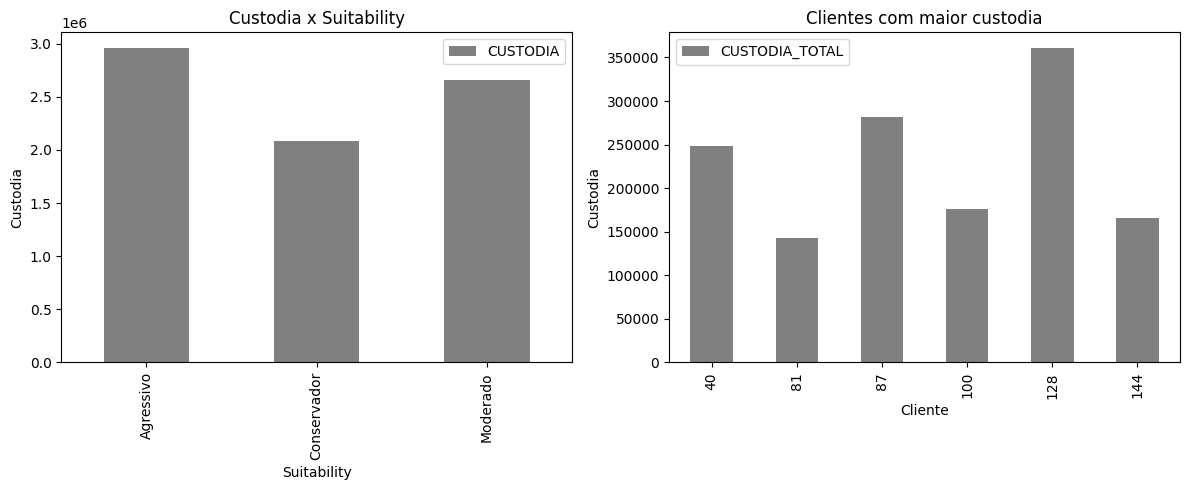

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Configurações
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de Custódia por Suitability
grafico_custodia_clientes = base_completa.groupby(['SUITABILITY'])[['CUSTODIA']].sum()
grafico_custodia_clientes = grafico_custodia_clientes.reset_index()
grafico_custodia_clientes = grafico_custodia_clientes.sort_values(by='CUSTODIA', ascending=False)  # Ordenar pela custódia em ordem decrescente
grouped = grafico_custodia_clientes.groupby('SUITABILITY').mean()
grouped.plot(kind='bar', ax=ax1, color=['grey'])  # Usar cores preto e cinza

ax1.set_ylabel('Custodia')
ax1.set_xlabel('Suitability')
ax1.set_title('Custodia x Suitability')

# Gráfico de Custódia Total por Cliente
grafico_maiores_clientes = maiores_clientes.groupby(['COD_DIM_CONTA'])[['CUSTODIA_TOTAL']].sum()
grafico_maiores_clientes = grafico_maiores_clientes.reset_index()
grafico_maiores_clientes = grafico_maiores_clientes.sort_values(by='CUSTODIA_TOTAL', ascending=False)  # Ordenar pela custódia total em ordem decrescente
grouped = grafico_maiores_clientes.groupby('COD_DIM_CONTA').mean()
grouped.plot(kind='bar', ax=ax2, color=['grey'])  # Usar cores preto e cinza

ax2.set_ylabel('Custodia')
ax2.set_xlabel('Cliente')
ax2.set_title('Clientes com maior custodia')

plt.tight_layout()
plt.show()


# **Analisar os produtos com maior alocação dos clientes dentro do canal B2C**

In [14]:
ranking_produtos = sqldf("""
  WITH AUX AS (
      SELECT DISTINCT COD_DIM_PRODUTO, COD_DIM_TEMPO,
      ROUND(SUM(CUSTODIA) OVER (PARTITION BY COD_DIM_TEMPO,COD_DIM_PRODUTO) / SUM(CUSTODIA) OVER (PARTITION BY COD_DIM_TEMPO) * 100, 1) AS PORCENT_CUSTODIA
      FROM base_completa
      WHERE CANAL = "B2C"
      ORDER BY PORCENT_CUSTODIA DESC)
  SELECT *,
  (SELECT COUNT(*) FROM AUX AS sub WHERE sub.COD_DIM_TEMPO = AUX.COD_DIM_TEMPO AND sub.PORCENT_CUSTODIA >= AUX.PORCENT_CUSTODIA) AS RANKING
  FROM AUX
""")

top_produtos = sqldf("""
  SELECT * FROM ranking_produtos
  WHERE RANKING < 4
  ORDER BY COD_DIM_TEMPO DESC,RANKING ASC
""")

In [16]:
maiores_porcentagens = top_produtos.groupby('COD_DIM_TEMPO').apply(lambda x: x.nlargest(3, 'PORCENT_CUSTODIA')).reset_index(drop=True)
maiores_porcentagens['PORCENT_CUSTODIA'] = maiores_porcentagens['PORCENT_CUSTODIA'].astype(str) + '%'
maiores_porcentagens = maiores_porcentagens.rename(columns={'COD_DIM_TEMPO': 'Mês', 'COD_DIM_PRODUTO': 'Produto', 'PORCENT_CUSTODIA': 'Representatividade', 'RANKING': 'Ranking'})
tabela_top_produtos = maiores_porcentagens.style.set_table_styles([{
    'selector': 'caption',
    'props': [('font-size', '20px'), ('font-weight', 'bold')]
}, {
    'selector': 'th',
    'props': [('font-size', '16px'), ('text-align', 'center')]
}, {
    'selector': 'td',
    'props': [('font-size', '12px'), ('text-align', 'center'), ('max-width', '100%')]
}, {
    'selector': 'tr:nth-of-type(odd)',
    'props': [('background-color', '#f9f9f9')]
}, {
    'selector': 'tr:nth-of-type(even)',
    'props': [('background-color', 'white')]
}, {
    'selector': 'thead th',
    'props': [('background-color', '#333333'), ('color', 'white')]
}, {
    'selector': 'tbody tr:hover',
    'props': [('background-color', '#dddddd')]
}]).set_caption('Top 3 produtos em representatividade sobre o total (por mês)')
tabela_top_produtos

,Produto,Mês,Representatividade,Ranking
0,7,2021-08,12.4%,1
1,23,2021-08,8.7%,2
2,5,2021-08,8.6%,3
3,46,2021-09,9.0%,1
4,28,2021-09,8.9%,2
5,9,2021-09,7.9%,3
6,41,2021-10,18.0%,1
7,31,2021-10,13.7%,2
8,46,2021-10,10.2%,3


# **Analisar o histórico de distribuição de produtos do cliente com os maiores desvios atualmente**

# **Calcular a receita potencial gerada com a alocação recomendada dos clientes.**

<ipython-input-63-5006e4e8ec2d>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(df_somas['COD_DIM_TEMPO'], rotation=45)


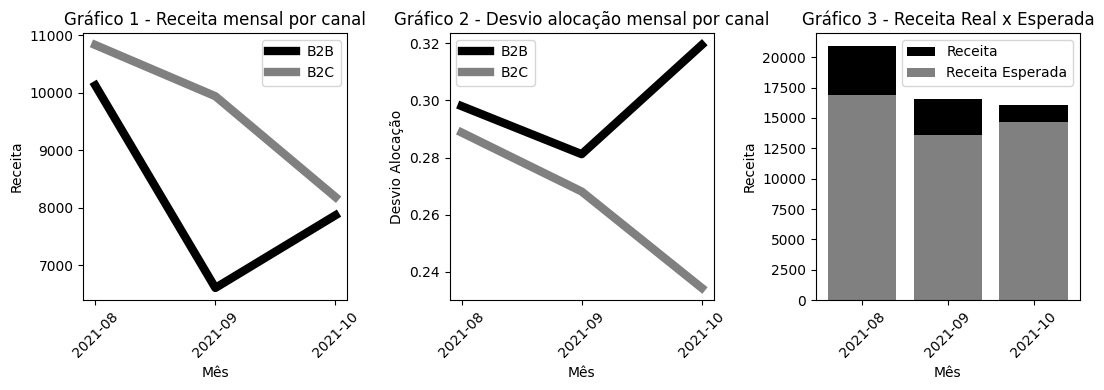

In [63]:
largura_barra = 0.35
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(11, 4))
receita_mensal_canal_soma = base_completa.groupby(['COD_DIM_TEMPO', 'CANAL'])[['RECEITA']].sum()
receita_mensal_canal_soma = receita_mensal_canal_soma.reset_index()
indices = np.arange(len(receita_mensal_canal_soma['COD_DIM_TEMPO'].unique()))
cores = ['black', 'grey']
largura_linha = 2.5  # Definindo a largura da linha
for i, (canal, dados_canal) in enumerate(receita_mensal_canal_soma.groupby('CANAL')):
    ax1.plot(indices, dados_canal['RECEITA'], label=canal, color=cores[i], linewidth=6.0)
ax1.set_xlabel('Mês')
ax1.set_ylabel('Receita')
ax1.set_title('Gráfico 1 - Receita mensal por canal')
ax1.set_xticks(indices)
ax1.set_xticklabels(receita_mensal_canal_soma['COD_DIM_TEMPO'].unique(), rotation=45)
ax1.grid(False)
ax1.legend()

desvio_mensal_canal_media = base_completa.groupby(['COD_DIM_TEMPO', 'CANAL'])[['DESVIO_ALOCACAO']].mean()
desvio_mensal_canal_media = desvio_mensal_canal_media.reset_index()

for i, (canal, dados_canal) in enumerate(desvio_mensal_canal_media.groupby('CANAL')):
    ax2.plot(indices, dados_canal['DESVIO_ALOCACAO'], label=canal, color=cores[i], linewidth=6.0)

ax2.set_xlabel('Mês')
ax2.set_ylabel('Desvio Alocação')
ax2.set_title('Gráfico 2 - Desvio alocação mensal por canal')
ax2.set_xticks(indices)
ax2.set_xticklabels(desvio_mensal_canal_media['COD_DIM_TEMPO'].unique(), rotation=45)
ax2.grid(False)
ax2.legend()

df_somas = base_completa.groupby('COD_DIM_TEMPO').agg({'RECEITA': 'sum', 'RECEITA_ESPERADA': 'sum'}).reset_index()

ax3.bar(df_somas['COD_DIM_TEMPO'], df_somas['RECEITA'], color='black', label='Receita')
ax3.bar(df_somas['COD_DIM_TEMPO'], df_somas['RECEITA_ESPERADA'], color='grey', label='Receita Esperada')
ax3.set_xlabel('Mês')
ax3.set_ylabel('Receita')
ax3.set_title('Gráfico 3 - Receita Real x Esperada')
ax3.set_xticklabels(df_somas['COD_DIM_TEMPO'], rotation=45)
ax3.grid(False)
ax3.legend()

plt.tight_layout()
plt.show()


 ## **Analisando os gráficos de receita e desvio de alocação mensais, fica claro que a receita está caindo a medida que o desvio da alocação diminui. Isso mostra que a recomendação de alocação não está coerente com o aumento da receita.**

## **Isso pode ser comprovado no gráfico 3, que mostra que a receita seria menor caso atendesse 100% a alocação recomendada.**